In [1]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import StandardScaler, LabelEncoder
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# dataset
file_path = r"C:\Users\kiara\KiaraADS502\breast-cancer.csv"
data = pd.read_csv(file_path)

# drop irrelevant columns
if 'id' in data.columns:
    data = data.drop(columns=['id'])

# check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [3]:
# turn categorical variables
if 'diagnosis' in data.columns:
    label_encoder = LabelEncoder()
    data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# normalize/Standardize numeric features
scaler = StandardScaler()
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Check for class imbalance
print("Class distribution:\n", data['diagnosis'].value_counts())

# results.
print("Cleaned dataset sample:")
print(data.head())


Class distribution:
 diagnosis
-0.770609    357
 1.297676    212
Name: count, dtype: int64
Cleaned dataset sample:
   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0   1.297676     1.097064     -2.073335        1.269934   0.984375   
1   1.297676     1.829821     -0.353632        1.685955   1.908708   
2   1.297676     1.579888      0.456187        1.566503   1.558884   
3   1.297676    -0.768909      0.253732       -0.592687  -0.764464   
4   1.297676     1.750297     -1.151816        1.776573   1.826229   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         1.568466          3.283515        2.652874             2.532475   
1        -0.826962         -0.487072       -0.023846             0.548144   
2         0.942210          1.052926        1.363478             2.037231   
3         3.283553          3.402909        1.915897             1.451707   
4         0.280372          0.539340        1.371011             1.428493   

 

In [4]:
print("Summary of Numeric Features:")
for col in data.columns:
    if is_numeric_dtype(data[col]):
        print(f'{col}:')
        print(f'\tMean = {data[col].mean():.2f}')
        print(f'\tStandard Deviation = {data[col].std():.2f}')
        print(f'\tMinimum = {data[col].min():.2f}')
        print(f'\tMaximum = {data[col].max():.2f}')
        print(f'\t25th Percentile = {data[col].quantile(0.25):.2f}')
        print(f'\t50th Percentile (Median) = {data[col].median():.2f}')
        print(f'\t75th Percentile = {data[col].quantile(0.75):.2f}')
        print()


Summary of Numeric Features:
diagnosis:
	Mean = 0.00
	Standard Deviation = 1.00
	Minimum = -0.77
	Maximum = 1.30
	25th Percentile = -0.77
	50th Percentile (Median) = -0.77
	75th Percentile = 1.30

radius_mean:
	Mean = 0.00
	Standard Deviation = 1.00
	Minimum = -2.03
	Maximum = 3.97
	25th Percentile = -0.69
	50th Percentile (Median) = -0.22
	75th Percentile = 0.47

texture_mean:
	Mean = 0.00
	Standard Deviation = 1.00
	Minimum = -2.23
	Maximum = 4.65
	25th Percentile = -0.73
	50th Percentile (Median) = -0.10
	75th Percentile = 0.58

perimeter_mean:
	Mean = 0.00
	Standard Deviation = 1.00
	Minimum = -1.98
	Maximum = 3.98
	25th Percentile = -0.69
	50th Percentile (Median) = -0.24
	75th Percentile = 0.50

area_mean:
	Mean = 0.00
	Standard Deviation = 1.00
	Minimum = -1.45
	Maximum = 5.25
	25th Percentile = -0.67
	50th Percentile (Median) = -0.30
	75th Percentile = 0.36

smoothness_mean:
	Mean = 0.00
	Standard Deviation = 1.00
	Minimum = -3.11
	Maximum = 4.77
	25th Percentile = -0.71
	50th 

In [5]:
# only columns that contain worst in their names
worst_columns = [col for col in data.columns if "worst" in col]

# Calculate covariance for worst columns
print('Covariance:')
covariance_matrix = data[worst_columns].cov(numeric_only=True)
print(covariance_matrix)


Covariance:
                         radius_worst  texture_worst  perimeter_worst  \
radius_worst                 1.001761       0.360554         0.995457   
texture_worst                0.360554       1.001761         0.365741   
perimeter_worst              0.995457       0.365741         1.001761   
area_worst                   0.985747       0.346451         0.979299   
smoothness_worst             0.216956       0.225826         0.237191   
compactness_worst            0.476658       0.361468         0.530340   
concavity_worst              0.574985       0.369014         0.619433   
concave points_worst         0.788810       0.360388         0.817759   
symmetry_worst               0.243958       0.233438         0.269967   
fractal_dimension_worst      0.093657       0.219508         0.139202   

                         area_worst  smoothness_worst  compactness_worst  \
radius_worst               0.985747          0.216956           0.476658   
texture_worst              0.346

Correlation:
                         radius_worst  texture_worst  perimeter_worst  \
radius_worst                 1.000000       0.359921         0.993708   
texture_worst                0.359921       1.000000         0.365098   
perimeter_worst              0.993708       0.365098         1.000000   
area_worst                   0.984015       0.345842         0.977578   
smoothness_worst             0.216574       0.225429         0.236775   
compactness_worst            0.475820       0.360832         0.529408   
concavity_worst              0.573975       0.368366         0.618344   
concave points_worst         0.787424       0.359755         0.816322   
symmetry_worst               0.243529       0.233027         0.269493   
fractal_dimension_worst      0.093492       0.219122         0.138957   

                         area_worst  smoothness_worst  compactness_worst  \
radius_worst               0.984015          0.216574           0.475820   
texture_worst              0.34

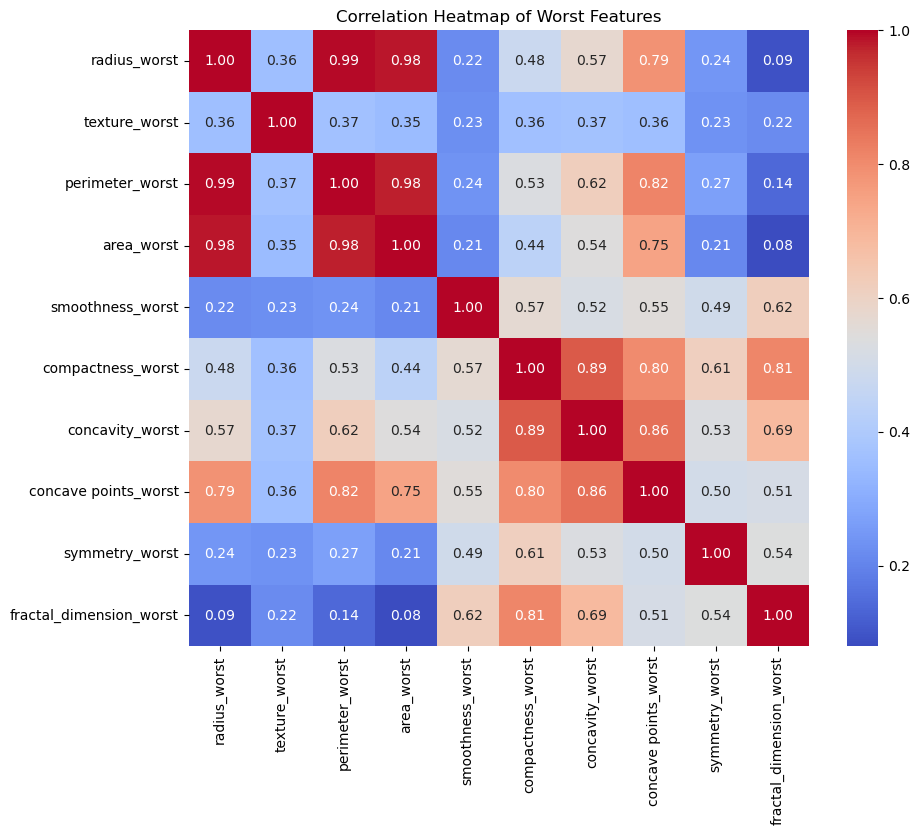

In [6]:
# only columns that contain worst in their names
worst_columns = [col for col in data.columns if "worst" in col]

# correlation for the worst columns
print('Correlation:')
correlation_matrix = data[worst_columns].corr(numeric_only=True)
print(correlation_matrix)

# heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title('Correlation Heatmap of Worst Features')
plt.show()

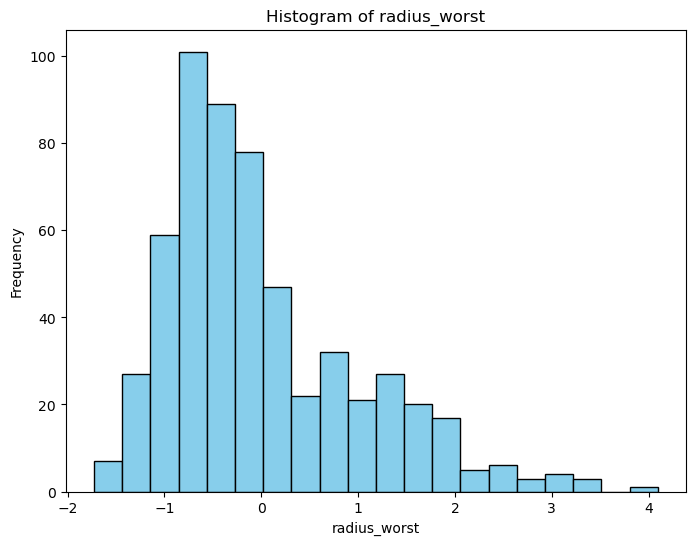

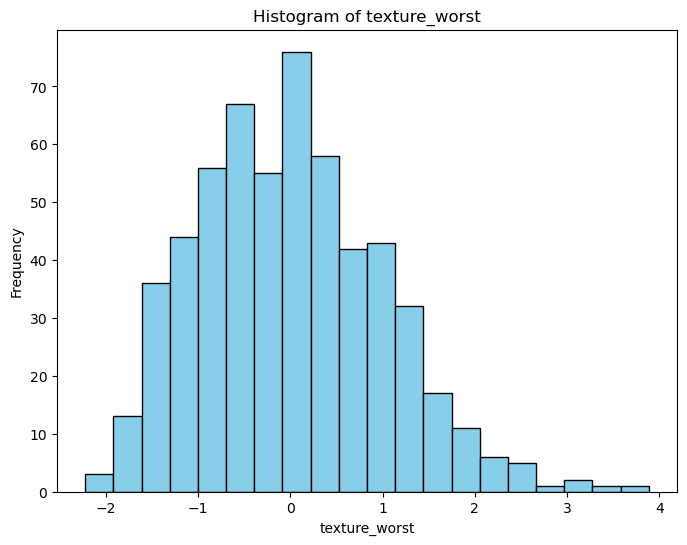

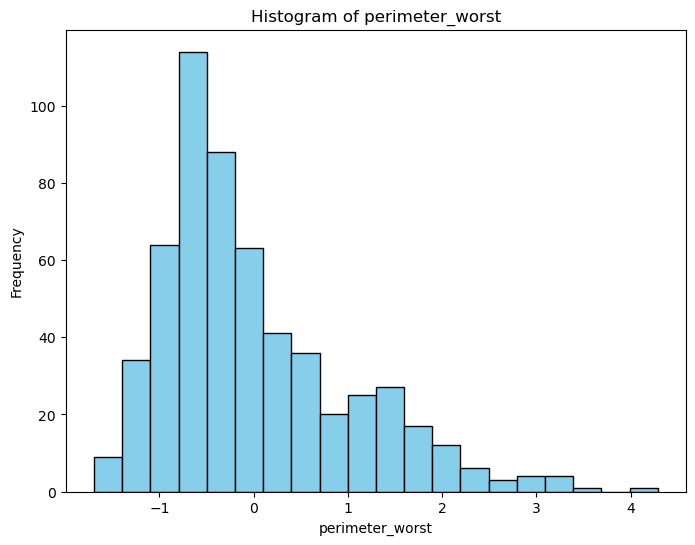

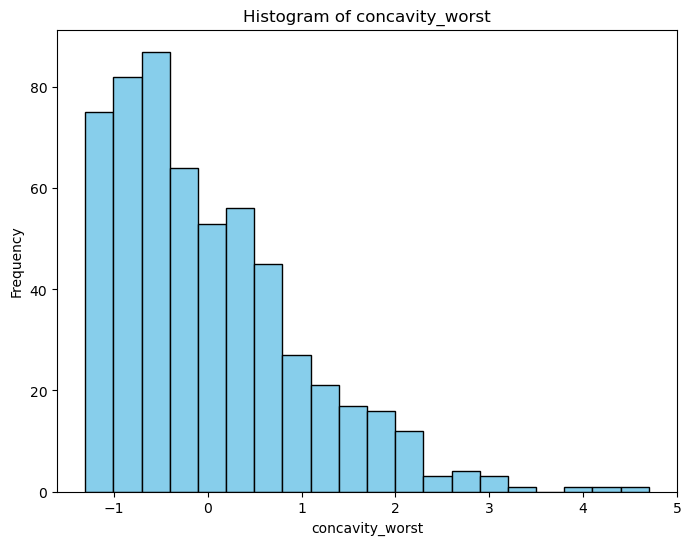

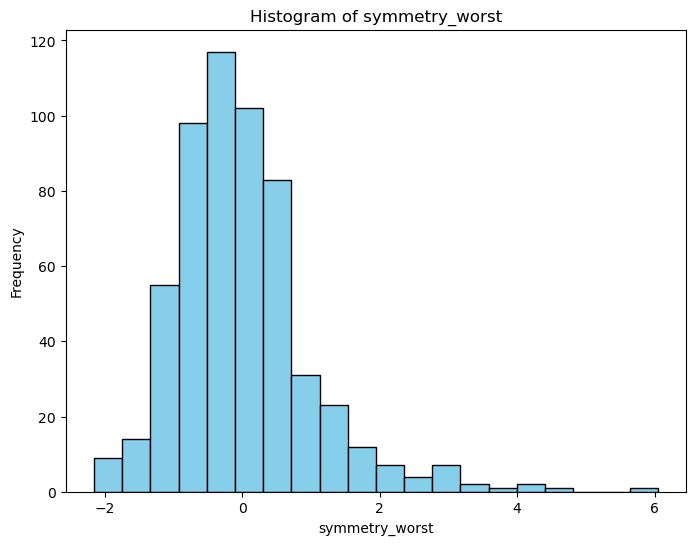

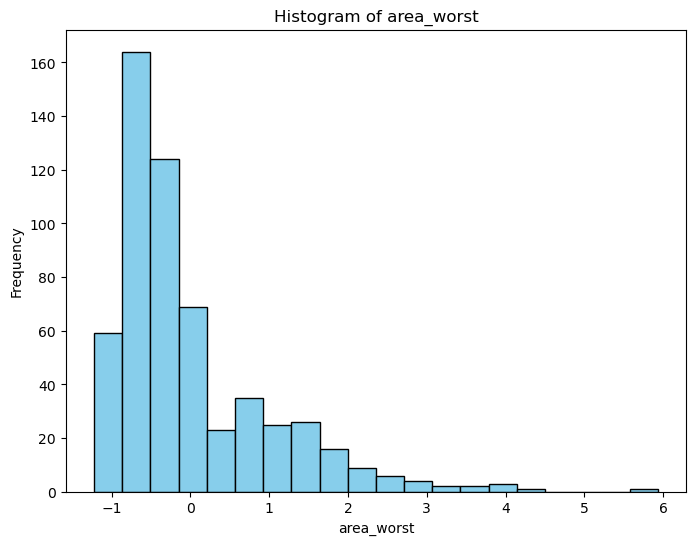

In [12]:
# List of specific columns to plot histograms
columns_to_plot = [
    'radius_worst', 
    'texture_worst', 
    'perimeter_worst', 
    'concavity_worst', 
    'symmetry_worst' ,
    'area_worst'
]

# histograms for each column
for col in columns_to_plot:
    if col in data.columns:  
        plt.figure(figsize=(8, 6))
        data[col].hist(bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(False)
        plt.show()
    else:
        print(f"Column '{col}' not found in the dataset.")

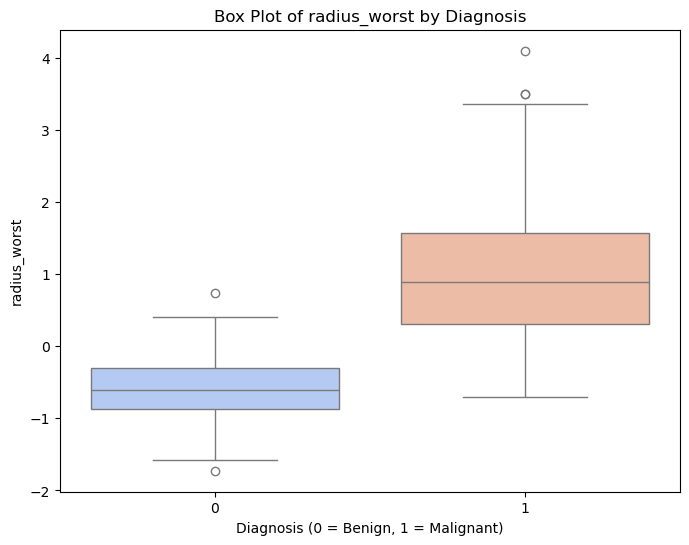

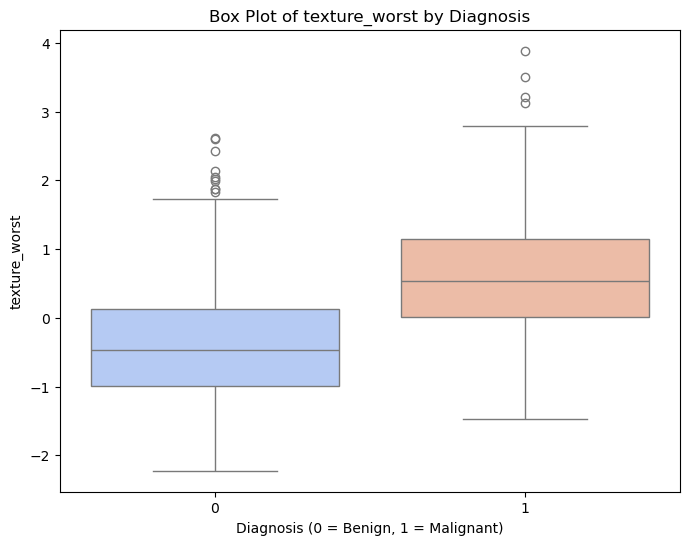

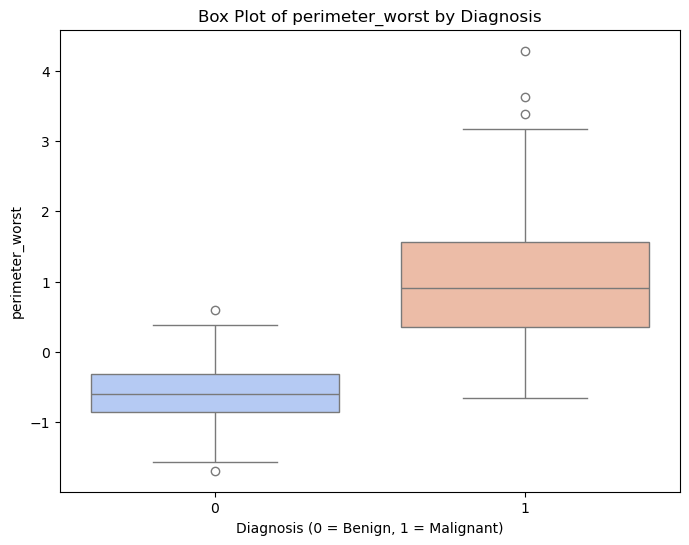

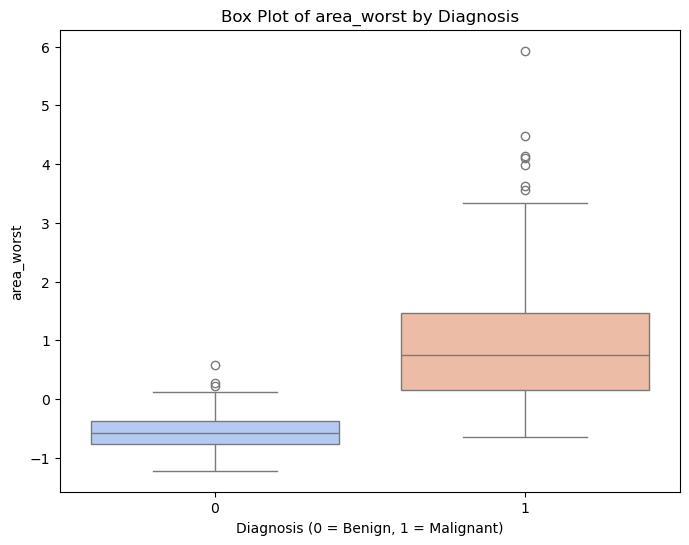

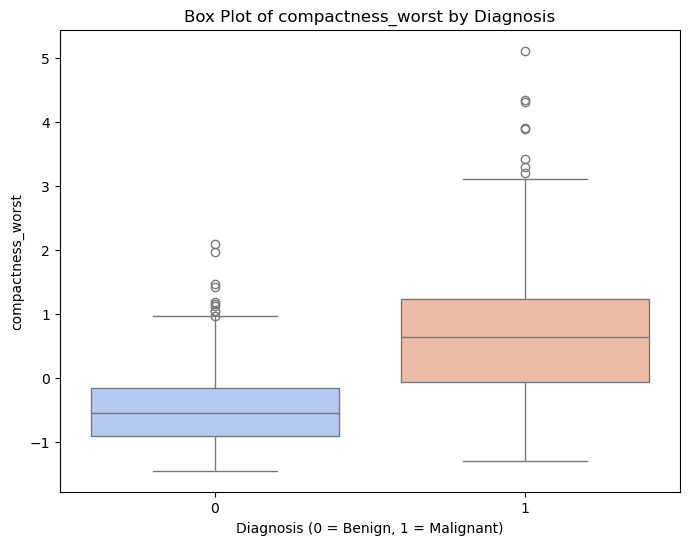

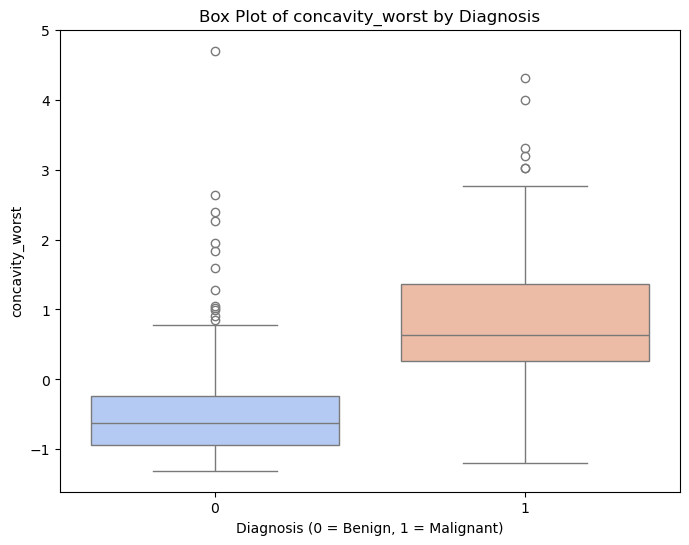

In [12]:
# List of worst features 
worst_features = [
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 
    'compactness_worst', 'concavity_worst'
]

# box plots for each selected feature
for feature in worst_features:
    if feature in data.columns:  # Ensure the feature exists in the dataset
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='diagnosis', y=feature, data=data, hue='diagnosis', palette='coolwarm', dodge=False, legend=False)
        plt.title(f'Box Plot of {feature} by Diagnosis')
        plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)')
        plt.ylabel(feature)
        plt.show()

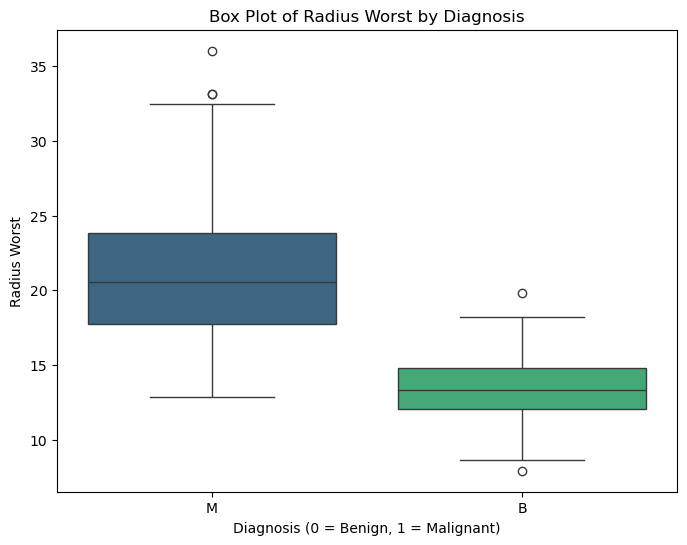

In [19]:
# radius_worst
plt.figure(figsize=(8, 6))
sns.boxplot(x='diagnosis', y='radius_worst', data=data, palette='viridis')
plt.title('Box Plot of Radius Worst by Diagnosis')
plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)')
plt.ylabel('Radius Worst')
plt.show()

# suppress specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

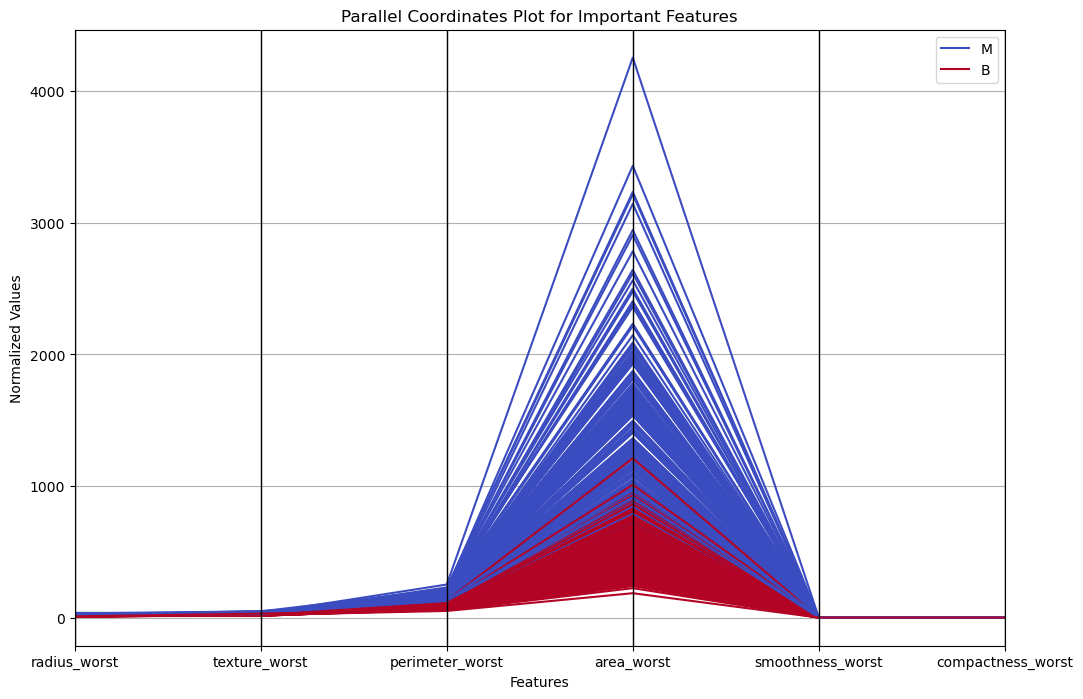

In [ ]:
# Ensure the target column ('diagnosis') is categorical
data['diagnosis'] = da ta['diagnosis'].astype(str)  # Convert to string for clear labeling

# subset of features for visualization
important_features = [
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 
    'smoothness_worst', 'compactness_worst'
]

# new DataFrame for parallel coordinates
subset_data = data[important_features + ['diagnosis']]

# Plot parallel coordinates
plt.figure(figsize=(12, 8))
parallel_coordinates(subset_data, class_column='diagnosis', colormap='coolwarm')
plt.title('Parallel Coordinates Plot for Important Features')
plt.xlabel('Features')
plt.ylabel('Normalized Values')
plt.grid(True)
plt.show()
